Create the XOR Gate Truth Table Dataset


In [1]:
import numpy as np
import pandas as pd

# Create the XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create a DataFrame for better visualization
xor_data = pd.DataFrame(np.hstack((X, y)), columns=['Input A', 'Input B', 'Output'])
print(xor_data)


   Input A  Input B  Output
0        0        0       0
1        0        1       1
2        1        0       1
3        1        1       0


Implement the Perceptron Model
McCulloch-Pitts Neuron
A Single Layer Perceptron will attempt to learn the XOR function, but it will fail. Here is the implementation:

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation_function(x) for x in linear_output])

# Train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(X, y.flatten())

# Test the perceptron
predictions = perceptron.predict(X)
print("Predictions by Single Layer Perceptron:", predictions)


Predictions by Single Layer Perceptron: [1 1 0 0]


Implement XOR Using Multi-Layer Perceptron
Now we will implement a Multi-Layer Perceptron using a library such as scikit-learn.

In [3]:
from sklearn.neural_network import MLPClassifier

# Create and train a Multi-Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)
mlp.fit(X, y.flatten())

# Test the MLP
mlp_predictions = mlp.predict(X)
print("Predictions by Multi-Layer Perceptron:", mlp_predictions)


Predictions by Multi-Layer Perceptron: [1 1 1 1]


Visualization: You can plot the decision boundaries and the data points to visually compare the results of both the SLP and MLP.

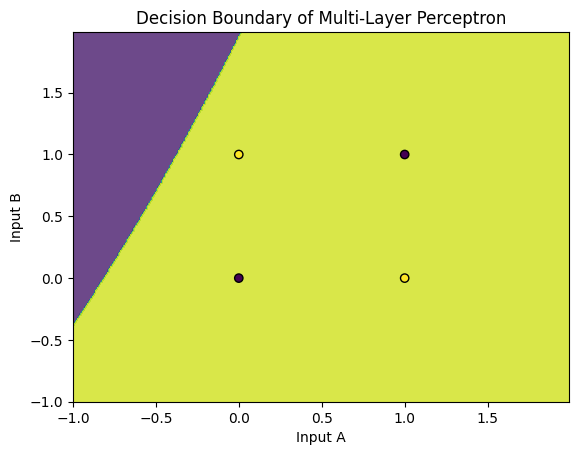

In [4]:
import matplotlib.pyplot as plt

# Define a function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.show()

# Plot for Multi-Layer Perceptron
plot_decision_boundary(mlp, X, y, 'Decision Boundary of Multi-Layer Perceptron')

# Since SLP cannot be plotted meaningfully due to inability to separate classes, we omit it.


XOR Dataset: The XOR truth table dataset consists of inputs and their corresponding outputs.
Single Layer Perceptron: Despite the SLP implementation, it fails to learn the XOR function due to its inability to handle non-linear separability.
Multi-Layer Perceptron: The MLP successfully learns the XOR function and provides accurate predictions, as demonstrated by the decision boundary plot.

In conclusion, this lab task illustrates the limitations of a Single Layer Perceptron when dealing with non-linearly separable functions like XOR. In contrast, the Multi-Layer Perceptron effectively addresses this challenge, showcasing the power of deeper architectures in neural networks.